In [1]:
%matplotlib inline
import mxnet as mx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import logging
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
files = os.listdir('train/')
files.sort()

In [ ]:
imgs = []
for f in files:
    img = Image.open('train/' + f)
    img = img.resize((64, 64))
    imgs.append(np.asarray(img))
    img.close()
imgs = np.array(imgs)

In [ ]:
plt.imshow(imgs[100][:, :, 0])

In [ ]:
label = pd.read_csv('labels.csv')

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(label['breed'])
enc = OneHotEncoder(sparse=False)
onehot = enc.fit_transform(integer_encoded.reshape(len(integer_encoded), 1))

In [ ]:
np.random.seed(123)
index = np.random.choice(len(label), size=int(0.7 * len(label)), replace=False)

In [ ]:
len(index)

In [ ]:
lst = pd.read_csv('rectest.lst', sep='\t', header=None)

In [ ]:
lst.columns = ['id', 'label', 'path']
lst = lst.sort_values('path')

In [ ]:
lst['label'] = integer_encoded

In [ ]:
lst.head()

In [ ]:
lst.loc[~lst['id'].isin(index), :].to_csv('test.lst', index=False, header=False, sep='\t')

In [ ]:
lst.loc[lst['id'].isin(index), :].to_csv('train.lst', index=False, header=False, sep='\t')

In [2]:
def get_net():
    data = mx.sym.Variable('data')
    conv1 = mx.sym.Convolution(data, kernel=(5, 5), stride=(1, 1), num_filter=32)
    pool1 = mx.sym.Pooling(conv1, pool_type='max', kernel=(2, 2), stride=(1, 1))
    relu1 = mx.sym.Activation(data=pool1, act_type='relu')
    conv2 = mx.sym.Convolution(relu1, kernel=(5, 5), stride=(1, 1), num_filter=32)
    pool2 = mx.sym.Pooling(conv2, pool_type='max', kernel=(2, 2), stride=(1, 1))
    relu2 = mx.sym.Activation(data=pool2, act_type='relu')
    flatten = mx.sym.flatten(data=relu2)
    fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=5000)
    tanh1 = mx.sym.Activation(data=fc1, act_type='tanh')
    fc2 = mx.sym.FullyConnected(data=tanh1, num_hidden=120)
    return(mx.sym.SoftmaxOutput(data=fc2, name='softmax'))

In [7]:
def get_symbol():
    data = mx.symbol.Variable(name="data")
    conv1_1 = mx.symbol.Convolution(name='conv1_1', data=data, num_filter=64, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu1_1 = mx.symbol.Activation(
        name='relu1_1', data=conv1_1, act_type='relu')
    conv1_2 = mx.symbol.Convolution(name='conv1_2', data=relu1_1, num_filter=64, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu1_2 = mx.symbol.Activation(
        name='relu1_2', data=conv1_2, act_type='relu')
    pool1 = mx.symbol.Pooling(name='pool1', data=relu1_2, pad=(
        0, 0), kernel=(2, 2), stride=(2, 2), pool_type='max')
    conv2_1 = mx.symbol.Convolution(name='conv2_1', data=pool1, num_filter=128, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu2_1 = mx.symbol.Activation(
        name='relu2_1', data=conv2_1, act_type='relu')
    conv2_2 = mx.symbol.Convolution(name='conv2_2', data=relu2_1, num_filter=128, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu2_2 = mx.symbol.Activation(
        name='relu2_2', data=conv2_2, act_type='relu')
    pool2 = mx.symbol.Pooling(name='pool2', data=relu2_2, pad=(
        0, 0), kernel=(2, 2), stride=(2, 2), pool_type='max')
    conv3_1 = mx.symbol.Convolution(name='conv3_1', data=pool2, num_filter=256, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu3_1 = mx.symbol.Activation(
        name='relu3_1', data=conv3_1, act_type='relu')
    conv3_2 = mx.symbol.Convolution(name='conv3_2', data=relu3_1, num_filter=256, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu3_2 = mx.symbol.Activation(
        name='relu3_2', data=conv3_2, act_type='relu')
    conv3_3 = mx.symbol.Convolution(name='conv3_3', data=relu3_2, num_filter=256, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu3_3 = mx.symbol.Activation(
        name='relu3_3', data=conv3_3, act_type='relu')
    pool3 = mx.symbol.Pooling(name='pool3', data=relu3_3, pad=(
        0, 0), kernel=(2, 2), stride=(2, 2), pool_type='max')
    conv4_1 = mx.symbol.Convolution(name='conv4_1', data=pool3, num_filter=512, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu4_1 = mx.symbol.Activation(
        name='relu4_1', data=conv4_1, act_type='relu')
    conv4_2 = mx.symbol.Convolution(name='conv4_2', data=relu4_1, num_filter=512, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu4_2 = mx.symbol.Activation(
        name='relu4_2', data=conv4_2, act_type='relu')
    conv4_3 = mx.symbol.Convolution(name='conv4_3', data=relu4_2, num_filter=512, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu4_3 = mx.symbol.Activation(
        name='relu4_3', data=conv4_3, act_type='relu')
    pool4 = mx.symbol.Pooling(name='pool4', data=relu4_3, pad=(
        0, 0), kernel=(2, 2), stride=(2, 2), pool_type='max')
    conv5_1 = mx.symbol.Convolution(name='conv5_1', data=pool4, num_filter=512, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu5_1 = mx.symbol.Activation(
        name='relu5_1', data=conv5_1, act_type='relu')
    conv5_2 = mx.symbol.Convolution(name='conv5_2', data=relu5_1, num_filter=512, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu5_2 = mx.symbol.Activation(
        name='relu5_2', data=conv5_2, act_type='relu')
    conv5_3 = mx.symbol.Convolution(name='conv5_3', data=relu5_2, num_filter=512, pad=(
        1, 1), kernel=(3, 3), stride=(1, 1), no_bias=False)
    relu5_3 = mx.symbol.Activation(
        name='relu5_3', data=conv5_3, act_type='relu')
    pool5 = mx.symbol.Pooling(name='pool5', data=relu5_3, pad=(
        0, 0), kernel=(2, 2), stride=(2, 2), pool_type='max')
    flatten_0 = mx.symbol.Flatten(name='flatten_0', data=pool5)
    fc6 = mx.symbol.FullyConnected(
        name='fc6', data=flatten_0, num_hidden=4096, no_bias=False)
    relu6 = mx.symbol.Activation(name='relu6', data=fc6, act_type='relu')
    drop6 = mx.symbol.Dropout(name='drop6', data=relu6, p=0.500000)
    fc7 = mx.symbol.FullyConnected(
        name='fc7', data=drop6, num_hidden=4096, no_bias=False)
    relu7 = mx.symbol.Activation(name='relu7', data=fc7, act_type='relu')
    drop7 = mx.symbol.Dropout(name='drop7', data=relu7, p=0.500000)
    fc8 = mx.symbol.FullyConnected(name='fc8', data=drop7, num_hidden=120, no_bias=False)
    prob = mx.symbol.SoftmaxOutput(name='softmax', data=fc8)
    return prob


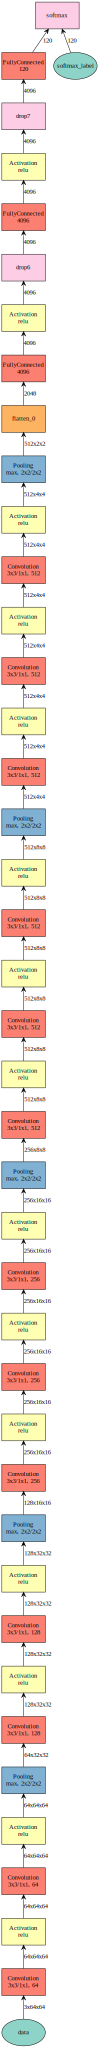

In [8]:
shape = {'data': (64, 3, 64, 64), 'softmax_label': (64, 120)}
mx.viz.plot_network(symbol=get_symbol(), shape=shape)

In [3]:
batch_size = 32
# data_train = mx.image.ImageIter(path_imgrec='rectest.rec', batch_size=batch_size, data_shape=(3, 64, 64), label_width=120)
data_train = mx.image.ImageIter(path_imgrec='train.rec', batch_size=batch_size, data_shape=(3, 64, 64), label_width=120)
data_test = mx.image.ImageIter(path_imgrec='test.rec', batch_size=batch_size, data_shape=(3, 64, 64), label_width=120)
lenet = get_net()

In [4]:
model = mx.mod.Module(symbol=get_symbol(), context=[mx.gpu(1)], data_names=['data'], label_names=['softmax_label'])

In [5]:
param = {'learning_rate': 0.1}

In [6]:
logging.getLogger().setLevel(logging.DEBUG)
model.fit(train_data=data_train, eval_data=data_test, optimizer='sgd', optimizer_params=param,
          eval_metric='acc', num_epoch=1000, batch_end_callback=mx.callback.Speedometer(batch_size, 50))

INFO:root:Epoch[0] Batch [50]	Speed: 787.77 samples/sec	accuracy=0.009804
INFO:root:Epoch[0] Batch [100]	Speed: 757.85 samples/sec	accuracy=0.008125
INFO:root:Epoch[0] Batch [150]	Speed: 790.23 samples/sec	accuracy=0.005000
INFO:root:Epoch[0] Batch [200]	Speed: 790.54 samples/sec	accuracy=0.006250
INFO:root:Epoch[0] Train-accuracy=0.010870
INFO:root:Epoch[0] Time cost=13.591
INFO:root:Epoch[0] Validation-accuracy=0.008138
INFO:root:Epoch[1] Batch [50]	Speed: 790.58 samples/sec	accuracy=0.009804
INFO:root:Epoch[1] Batch [100]	Speed: 789.78 samples/sec	accuracy=0.008125
INFO:root:Epoch[1] Batch [150]	Speed: 790.93 samples/sec	accuracy=0.005000
INFO:root:Epoch[1] Batch [200]	Speed: 787.91 samples/sec	accuracy=0.006250
INFO:root:Epoch[1] Train-accuracy=0.010870
INFO:root:Epoch[1] Time cost=9.077
INFO:root:Epoch[1] Validation-accuracy=0.008138
INFO:root:Epoch[2] Batch [50]	Speed: 792.30 samples/sec	accuracy=0.009804
INFO:root:Epoch[2] Batch [100]	Speed: 785.85 samples/sec	accuracy=0.008125


INFO:root:Epoch[19] Batch [100]	Speed: 789.50 samples/sec	accuracy=0.008125
INFO:root:Epoch[19] Batch [150]	Speed: 789.57 samples/sec	accuracy=0.005005
INFO:root:Epoch[19] Batch [200]	Speed: 789.38 samples/sec	accuracy=0.006250
INFO:root:Epoch[19] Train-accuracy=0.010870
INFO:root:Epoch[19] Time cost=9.068
INFO:root:Epoch[19] Validation-accuracy=0.008138
INFO:root:Epoch[20] Batch [50]	Speed: 789.06 samples/sec	accuracy=0.009804
INFO:root:Epoch[20] Batch [100]	Speed: 788.54 samples/sec	accuracy=0.008125
INFO:root:Epoch[20] Batch [150]	Speed: 786.32 samples/sec	accuracy=0.005000
INFO:root:Epoch[20] Batch [200]	Speed: 788.45 samples/sec	accuracy=0.006250
INFO:root:Epoch[20] Train-accuracy=0.010870
INFO:root:Epoch[20] Time cost=9.084
INFO:root:Epoch[20] Validation-accuracy=0.008138
INFO:root:Epoch[21] Batch [50]	Speed: 791.05 samples/sec	accuracy=0.009804
INFO:root:Epoch[21] Batch [100]	Speed: 789.64 samples/sec	accuracy=0.008125
INFO:root:Epoch[21] Batch [150]	Speed: 788.24 samples/sec	ac

INFO:root:Epoch[38] Batch [100]	Speed: 788.65 samples/sec	accuracy=0.008125
INFO:root:Epoch[38] Batch [150]	Speed: 787.95 samples/sec	accuracy=0.005005
INFO:root:Epoch[38] Batch [200]	Speed: 785.77 samples/sec	accuracy=0.006250
INFO:root:Epoch[38] Train-accuracy=0.010870
INFO:root:Epoch[38] Time cost=9.087
INFO:root:Epoch[38] Validation-accuracy=0.008138
INFO:root:Epoch[39] Batch [50]	Speed: 791.44 samples/sec	accuracy=0.009804
INFO:root:Epoch[39] Batch [100]	Speed: 786.65 samples/sec	accuracy=0.008125
INFO:root:Epoch[39] Batch [150]	Speed: 787.25 samples/sec	accuracy=0.005000
INFO:root:Epoch[39] Batch [200]	Speed: 790.17 samples/sec	accuracy=0.006250
INFO:root:Epoch[39] Train-accuracy=0.010870
INFO:root:Epoch[39] Time cost=9.106
INFO:root:Epoch[39] Validation-accuracy=0.008138
INFO:root:Epoch[40] Batch [50]	Speed: 787.69 samples/sec	accuracy=0.009804
INFO:root:Epoch[40] Batch [100]	Speed: 786.78 samples/sec	accuracy=0.008120
INFO:root:Epoch[40] Batch [150]	Speed: 788.32 samples/sec	ac

INFO:root:Epoch[57] Batch [100]	Speed: 788.34 samples/sec	accuracy=0.008135
INFO:root:Epoch[57] Batch [150]	Speed: 785.61 samples/sec	accuracy=0.005016
INFO:root:Epoch[57] Batch [200]	Speed: 789.21 samples/sec	accuracy=0.006260
INFO:root:Epoch[57] Train-accuracy=0.010847
INFO:root:Epoch[57] Time cost=9.085
INFO:root:Epoch[57] Validation-accuracy=0.008173
INFO:root:Epoch[58] Batch [50]	Speed: 790.55 samples/sec	accuracy=0.009789
INFO:root:Epoch[58] Batch [100]	Speed: 788.89 samples/sec	accuracy=0.008130
INFO:root:Epoch[58] Batch [150]	Speed: 788.62 samples/sec	accuracy=0.005010
INFO:root:Epoch[58] Batch [200]	Speed: 788.56 samples/sec	accuracy=0.006250
INFO:root:Epoch[58] Train-accuracy=0.010904
INFO:root:Epoch[58] Time cost=9.078
INFO:root:Epoch[58] Validation-accuracy=0.008135
INFO:root:Epoch[59] Batch [50]	Speed: 788.76 samples/sec	accuracy=0.009804
INFO:root:Epoch[59] Batch [100]	Speed: 789.32 samples/sec	accuracy=0.008135
INFO:root:Epoch[59] Batch [150]	Speed: 788.98 samples/sec	ac

INFO:root:Epoch[76] Batch [100]	Speed: 788.23 samples/sec	accuracy=0.008115
INFO:root:Epoch[76] Batch [150]	Speed: 788.53 samples/sec	accuracy=0.005021
INFO:root:Epoch[76] Batch [200]	Speed: 789.08 samples/sec	accuracy=0.006266
INFO:root:Epoch[76] Train-accuracy=0.010858
INFO:root:Epoch[76] Time cost=9.094
INFO:root:Epoch[76] Validation-accuracy=0.008138
INFO:root:Epoch[77] Batch [50]	Speed: 790.57 samples/sec	accuracy=0.009809
INFO:root:Epoch[77] Batch [100]	Speed: 785.64 samples/sec	accuracy=0.008120
INFO:root:Epoch[77] Batch [150]	Speed: 788.18 samples/sec	accuracy=0.005021
INFO:root:Epoch[77] Batch [200]	Speed: 785.14 samples/sec	accuracy=0.006271
INFO:root:Epoch[77] Train-accuracy=0.010836
INFO:root:Epoch[77] Time cost=9.116
INFO:root:Epoch[77] Validation-accuracy=0.008138
INFO:root:Epoch[78] Batch [50]	Speed: 788.11 samples/sec	accuracy=0.009814
INFO:root:Epoch[78] Batch [100]	Speed: 787.45 samples/sec	accuracy=0.008135
INFO:root:Epoch[78] Batch [150]	Speed: 787.88 samples/sec	ac

INFO:root:Epoch[95] Batch [100]	Speed: 787.42 samples/sec	accuracy=0.008125
INFO:root:Epoch[95] Batch [150]	Speed: 787.20 samples/sec	accuracy=0.005000
INFO:root:Epoch[95] Batch [200]	Speed: 788.98 samples/sec	accuracy=0.006255
INFO:root:Epoch[95] Train-accuracy=0.010870
INFO:root:Epoch[95] Time cost=9.083
INFO:root:Epoch[95] Validation-accuracy=0.008138
INFO:root:Epoch[96] Batch [50]	Speed: 791.18 samples/sec	accuracy=0.009814
INFO:root:Epoch[96] Batch [100]	Speed: 787.73 samples/sec	accuracy=0.008130
INFO:root:Epoch[96] Batch [150]	Speed: 785.95 samples/sec	accuracy=0.005005
INFO:root:Epoch[96] Batch [200]	Speed: 786.74 samples/sec	accuracy=0.006255
INFO:root:Epoch[96] Train-accuracy=0.010870
INFO:root:Epoch[96] Time cost=9.105
INFO:root:Epoch[96] Validation-accuracy=0.008160
INFO:root:Epoch[97] Batch [50]	Speed: 788.05 samples/sec	accuracy=0.009804
INFO:root:Epoch[97] Batch [100]	Speed: 788.45 samples/sec	accuracy=0.008135
INFO:root:Epoch[97] Batch [150]	Speed: 787.46 samples/sec	ac

INFO:root:Epoch[114] Batch [50]	Speed: 788.00 samples/sec	accuracy=0.009804
INFO:root:Epoch[114] Batch [100]	Speed: 788.50 samples/sec	accuracy=0.008125
INFO:root:Epoch[114] Batch [150]	Speed: 789.22 samples/sec	accuracy=0.005016
INFO:root:Epoch[114] Batch [200]	Speed: 787.20 samples/sec	accuracy=0.006260
INFO:root:Epoch[114] Train-accuracy=0.010870
INFO:root:Epoch[114] Time cost=9.079
INFO:root:Epoch[114] Validation-accuracy=0.008179
INFO:root:Epoch[115] Batch [50]	Speed: 793.28 samples/sec	accuracy=0.009809
INFO:root:Epoch[115] Batch [100]	Speed: 788.51 samples/sec	accuracy=0.008115
INFO:root:Epoch[115] Batch [150]	Speed: 788.34 samples/sec	accuracy=0.005000
INFO:root:Epoch[115] Batch [200]	Speed: 788.69 samples/sec	accuracy=0.006234
INFO:root:Epoch[115] Train-accuracy=0.010847
INFO:root:Epoch[115] Time cost=9.100
INFO:root:Epoch[115] Validation-accuracy=0.008138
INFO:root:Epoch[116] Batch [50]	Speed: 790.17 samples/sec	accuracy=0.009814
INFO:root:Epoch[116] Batch [100]	Speed: 788.90

INFO:root:Epoch[132] Train-accuracy=0.010858
INFO:root:Epoch[132] Time cost=9.091
INFO:root:Epoch[132] Validation-accuracy=0.008138
INFO:root:Epoch[133] Batch [50]	Speed: 787.54 samples/sec	accuracy=0.009789
INFO:root:Epoch[133] Batch [100]	Speed: 787.94 samples/sec	accuracy=0.008115
INFO:root:Epoch[133] Batch [150]	Speed: 788.76 samples/sec	accuracy=0.005010
INFO:root:Epoch[133] Batch [200]	Speed: 786.87 samples/sec	accuracy=0.006276
INFO:root:Epoch[133] Train-accuracy=0.010870
INFO:root:Epoch[133] Time cost=9.092
INFO:root:Epoch[133] Validation-accuracy=0.008138
INFO:root:Epoch[134] Batch [50]	Speed: 787.53 samples/sec	accuracy=0.009804
INFO:root:Epoch[134] Batch [100]	Speed: 788.60 samples/sec	accuracy=0.008120
INFO:root:Epoch[134] Batch [150]	Speed: 787.43 samples/sec	accuracy=0.005000
INFO:root:Epoch[134] Batch [200]	Speed: 786.02 samples/sec	accuracy=0.006266
INFO:root:Epoch[134] Train-accuracy=0.010858
INFO:root:Epoch[134] Time cost=9.093
INFO:root:Epoch[134] Validation-accuracy

INFO:root:Epoch[151] Batch [200]	Speed: 788.18 samples/sec	accuracy=0.006250
INFO:root:Epoch[151] Train-accuracy=0.010858
INFO:root:Epoch[151] Time cost=9.086
INFO:root:Epoch[151] Validation-accuracy=0.008138
INFO:root:Epoch[152] Batch [50]	Speed: 791.24 samples/sec	accuracy=0.009809
INFO:root:Epoch[152] Batch [100]	Speed: 788.60 samples/sec	accuracy=0.008146
INFO:root:Epoch[152] Batch [150]	Speed: 788.03 samples/sec	accuracy=0.005005
INFO:root:Epoch[152] Batch [200]	Speed: 789.06 samples/sec	accuracy=0.006271
INFO:root:Epoch[152] Train-accuracy=0.010870
INFO:root:Epoch[152] Time cost=9.078
INFO:root:Epoch[152] Validation-accuracy=0.008138
INFO:root:Epoch[153] Batch [50]	Speed: 791.18 samples/sec	accuracy=0.009809
INFO:root:Epoch[153] Batch [100]	Speed: 787.50 samples/sec	accuracy=0.008109
INFO:root:Epoch[153] Batch [150]	Speed: 788.38 samples/sec	accuracy=0.005016
INFO:root:Epoch[153] Batch [200]	Speed: 787.90 samples/sec	accuracy=0.006250
INFO:root:Epoch[153] Train-accuracy=0.010870


INFO:root:Epoch[170] Batch [150]	Speed: 790.29 samples/sec	accuracy=0.005000
INFO:root:Epoch[170] Batch [200]	Speed: 790.70 samples/sec	accuracy=0.006260
INFO:root:Epoch[170] Train-accuracy=0.010858
INFO:root:Epoch[170] Time cost=9.056
INFO:root:Epoch[170] Validation-accuracy=0.008138
INFO:root:Epoch[171] Batch [50]	Speed: 788.32 samples/sec	accuracy=0.009799
INFO:root:Epoch[171] Batch [100]	Speed: 786.75 samples/sec	accuracy=0.008130
INFO:root:Epoch[171] Batch [150]	Speed: 784.06 samples/sec	accuracy=0.005026
INFO:root:Epoch[171] Batch [200]	Speed: 788.94 samples/sec	accuracy=0.006240
INFO:root:Epoch[171] Train-accuracy=0.010870
INFO:root:Epoch[171] Time cost=9.091
INFO:root:Epoch[171] Validation-accuracy=0.008138
INFO:root:Epoch[172] Batch [50]	Speed: 789.90 samples/sec	accuracy=0.009814
INFO:root:Epoch[172] Batch [100]	Speed: 790.43 samples/sec	accuracy=0.008125
INFO:root:Epoch[172] Batch [150]	Speed: 789.10 samples/sec	accuracy=0.005000
INFO:root:Epoch[172] Batch [200]	Speed: 788.2

INFO:root:Epoch[189] Batch [100]	Speed: 790.77 samples/sec	accuracy=0.008135
INFO:root:Epoch[189] Batch [150]	Speed: 789.61 samples/sec	accuracy=0.005005
INFO:root:Epoch[189] Batch [200]	Speed: 788.90 samples/sec	accuracy=0.006250
INFO:root:Epoch[189] Train-accuracy=0.010870
INFO:root:Epoch[189] Time cost=9.086
INFO:root:Epoch[189] Validation-accuracy=0.008138
INFO:root:Epoch[190] Batch [50]	Speed: 790.91 samples/sec	accuracy=0.009819
INFO:root:Epoch[190] Batch [100]	Speed: 790.81 samples/sec	accuracy=0.008130
INFO:root:Epoch[190] Batch [150]	Speed: 790.19 samples/sec	accuracy=0.005026
INFO:root:Epoch[190] Batch [200]	Speed: 789.46 samples/sec	accuracy=0.006245
INFO:root:Epoch[190] Train-accuracy=0.010858
INFO:root:Epoch[190] Time cost=9.059
INFO:root:Epoch[190] Validation-accuracy=0.008135
INFO:root:Epoch[191] Batch [50]	Speed: 789.85 samples/sec	accuracy=0.009804
INFO:root:Epoch[191] Batch [100]	Speed: 789.98 samples/sec	accuracy=0.008130
INFO:root:Epoch[191] Batch [150]	Speed: 791.1

INFO:root:Epoch[207] Validation-accuracy=0.008160
INFO:root:Epoch[208] Batch [50]	Speed: 788.92 samples/sec	accuracy=0.009809
INFO:root:Epoch[208] Batch [100]	Speed: 789.04 samples/sec	accuracy=0.008125
INFO:root:Epoch[208] Batch [150]	Speed: 788.21 samples/sec	accuracy=0.005016
INFO:root:Epoch[208] Batch [200]	Speed: 789.05 samples/sec	accuracy=0.006271
INFO:root:Epoch[208] Train-accuracy=0.010881
INFO:root:Epoch[208] Time cost=9.075
INFO:root:Epoch[208] Validation-accuracy=0.008135
INFO:root:Epoch[209] Batch [50]	Speed: 785.28 samples/sec	accuracy=0.009804
INFO:root:Epoch[209] Batch [100]	Speed: 783.35 samples/sec	accuracy=0.008115
INFO:root:Epoch[209] Batch [150]	Speed: 787.65 samples/sec	accuracy=0.005000
INFO:root:Epoch[209] Batch [200]	Speed: 789.34 samples/sec	accuracy=0.006245
INFO:root:Epoch[209] Train-accuracy=0.010870
INFO:root:Epoch[209] Time cost=9.099
INFO:root:Epoch[209] Validation-accuracy=0.008138
INFO:root:Epoch[210] Batch [50]	Speed: 787.67 samples/sec	accuracy=0.009

INFO:root:Epoch[226] Train-accuracy=0.010870
INFO:root:Epoch[226] Time cost=9.080
INFO:root:Epoch[226] Validation-accuracy=0.008138
INFO:root:Epoch[227] Batch [50]	Speed: 787.76 samples/sec	accuracy=0.009794
INFO:root:Epoch[227] Batch [100]	Speed: 788.72 samples/sec	accuracy=0.008135
INFO:root:Epoch[227] Batch [150]	Speed: 788.56 samples/sec	accuracy=0.005000
INFO:root:Epoch[227] Batch [200]	Speed: 788.07 samples/sec	accuracy=0.006271
INFO:root:Epoch[227] Train-accuracy=0.010858
INFO:root:Epoch[227] Time cost=9.088
INFO:root:Epoch[227] Validation-accuracy=0.008138
INFO:root:Epoch[228] Batch [50]	Speed: 788.75 samples/sec	accuracy=0.009824
INFO:root:Epoch[228] Batch [100]	Speed: 785.86 samples/sec	accuracy=0.008120
INFO:root:Epoch[228] Batch [150]	Speed: 788.77 samples/sec	accuracy=0.005000
INFO:root:Epoch[228] Batch [200]	Speed: 788.73 samples/sec	accuracy=0.006250
INFO:root:Epoch[228] Train-accuracy=0.010858
INFO:root:Epoch[228] Time cost=9.084
INFO:root:Epoch[228] Validation-accuracy

INFO:root:Epoch[245] Batch [200]	Speed: 784.65 samples/sec	accuracy=0.006266
INFO:root:Epoch[245] Train-accuracy=0.010892
INFO:root:Epoch[245] Time cost=9.101
INFO:root:Epoch[245] Validation-accuracy=0.008122
INFO:root:Epoch[246] Batch [50]	Speed: 787.91 samples/sec	accuracy=0.009799
INFO:root:Epoch[246] Batch [100]	Speed: 787.60 samples/sec	accuracy=0.008130
INFO:root:Epoch[246] Batch [150]	Speed: 788.01 samples/sec	accuracy=0.005026
INFO:root:Epoch[246] Batch [200]	Speed: 787.62 samples/sec	accuracy=0.006245
INFO:root:Epoch[246] Train-accuracy=0.010870
INFO:root:Epoch[246] Time cost=9.083
INFO:root:Epoch[246] Validation-accuracy=0.008138
INFO:root:Epoch[247] Batch [50]	Speed: 789.40 samples/sec	accuracy=0.009799
INFO:root:Epoch[247] Batch [100]	Speed: 786.46 samples/sec	accuracy=0.008135
INFO:root:Epoch[247] Batch [150]	Speed: 788.72 samples/sec	accuracy=0.005016
INFO:root:Epoch[247] Batch [200]	Speed: 789.28 samples/sec	accuracy=0.006255
INFO:root:Epoch[247] Train-accuracy=0.010858


INFO:root:Epoch[264] Batch [150]	Speed: 787.79 samples/sec	accuracy=0.005016
INFO:root:Epoch[264] Batch [200]	Speed: 788.50 samples/sec	accuracy=0.006245
INFO:root:Epoch[264] Train-accuracy=0.010870
INFO:root:Epoch[264] Time cost=9.092
INFO:root:Epoch[264] Validation-accuracy=0.008179
INFO:root:Epoch[265] Batch [50]	Speed: 789.35 samples/sec	accuracy=0.009809
INFO:root:Epoch[265] Batch [100]	Speed: 787.16 samples/sec	accuracy=0.008130
INFO:root:Epoch[265] Batch [150]	Speed: 788.57 samples/sec	accuracy=0.005005
INFO:root:Epoch[265] Batch [200]	Speed: 787.20 samples/sec	accuracy=0.006250
INFO:root:Epoch[265] Train-accuracy=0.010824
INFO:root:Epoch[265] Time cost=9.090
INFO:root:Epoch[265] Validation-accuracy=0.008138
INFO:root:Epoch[266] Batch [50]	Speed: 793.96 samples/sec	accuracy=0.009814
INFO:root:Epoch[266] Batch [100]	Speed: 788.33 samples/sec	accuracy=0.008125
INFO:root:Epoch[266] Batch [150]	Speed: 788.88 samples/sec	accuracy=0.005005
INFO:root:Epoch[266] Batch [200]	Speed: 788.7

INFO:root:Epoch[283] Batch [100]	Speed: 788.50 samples/sec	accuracy=0.008120
INFO:root:Epoch[283] Batch [150]	Speed: 787.74 samples/sec	accuracy=0.005010
INFO:root:Epoch[283] Batch [200]	Speed: 788.87 samples/sec	accuracy=0.006260
INFO:root:Epoch[283] Train-accuracy=0.010858
INFO:root:Epoch[283] Time cost=9.085
INFO:root:Epoch[283] Validation-accuracy=0.008138
INFO:root:Epoch[284] Batch [50]	Speed: 788.83 samples/sec	accuracy=0.009794
INFO:root:Epoch[284] Batch [100]	Speed: 787.49 samples/sec	accuracy=0.008135
INFO:root:Epoch[284] Batch [150]	Speed: 788.81 samples/sec	accuracy=0.005010
INFO:root:Epoch[284] Batch [200]	Speed: 788.13 samples/sec	accuracy=0.006250
INFO:root:Epoch[284] Train-accuracy=0.010881
INFO:root:Epoch[284] Time cost=9.077
INFO:root:Epoch[284] Validation-accuracy=0.008138
INFO:root:Epoch[285] Batch [50]	Speed: 790.96 samples/sec	accuracy=0.009794
INFO:root:Epoch[285] Batch [100]	Speed: 786.94 samples/sec	accuracy=0.008099
INFO:root:Epoch[285] Batch [150]	Speed: 788.2

INFO:root:Epoch[301] Validation-accuracy=0.008138
INFO:root:Epoch[302] Batch [50]	Speed: 790.94 samples/sec	accuracy=0.009799
INFO:root:Epoch[302] Batch [100]	Speed: 786.51 samples/sec	accuracy=0.008115
INFO:root:Epoch[302] Batch [150]	Speed: 789.49 samples/sec	accuracy=0.005016
INFO:root:Epoch[302] Batch [200]	Speed: 788.90 samples/sec	accuracy=0.006266
INFO:root:Epoch[302] Train-accuracy=0.010858
INFO:root:Epoch[302] Time cost=9.089
INFO:root:Epoch[302] Validation-accuracy=0.008138
INFO:root:Epoch[303] Batch [50]	Speed: 789.49 samples/sec	accuracy=0.009809
INFO:root:Epoch[303] Batch [100]	Speed: 789.96 samples/sec	accuracy=0.008130
INFO:root:Epoch[303] Batch [150]	Speed: 787.57 samples/sec	accuracy=0.005005
INFO:root:Epoch[303] Batch [200]	Speed: 788.95 samples/sec	accuracy=0.006245
INFO:root:Epoch[303] Train-accuracy=0.010858
INFO:root:Epoch[303] Time cost=9.077
INFO:root:Epoch[303] Validation-accuracy=0.009766
INFO:root:Epoch[304] Batch [50]	Speed: 791.56 samples/sec	accuracy=0.009

INFO:root:Epoch[320] Train-accuracy=0.010858
INFO:root:Epoch[320] Time cost=9.087
INFO:root:Epoch[320] Validation-accuracy=0.008168
INFO:root:Epoch[321] Batch [50]	Speed: 787.87 samples/sec	accuracy=0.009809
INFO:root:Epoch[321] Batch [100]	Speed: 788.86 samples/sec	accuracy=0.008115
INFO:root:Epoch[321] Batch [150]	Speed: 786.38 samples/sec	accuracy=0.005010
INFO:root:Epoch[321] Batch [200]	Speed: 789.00 samples/sec	accuracy=0.006260
INFO:root:Epoch[321] Train-accuracy=0.010892
INFO:root:Epoch[321] Time cost=9.082
INFO:root:Epoch[321] Validation-accuracy=0.008135
INFO:root:Epoch[322] Batch [50]	Speed: 792.23 samples/sec	accuracy=0.009804
INFO:root:Epoch[322] Batch [100]	Speed: 786.37 samples/sec	accuracy=0.008115
INFO:root:Epoch[322] Batch [150]	Speed: 787.13 samples/sec	accuracy=0.005000
INFO:root:Epoch[322] Batch [200]	Speed: 788.61 samples/sec	accuracy=0.006250
INFO:root:Epoch[322] Train-accuracy=0.010870
INFO:root:Epoch[322] Time cost=9.097
INFO:root:Epoch[322] Validation-accuracy

INFO:root:Epoch[339] Batch [200]	Speed: 786.67 samples/sec	accuracy=0.006255
INFO:root:Epoch[339] Train-accuracy=0.010881
INFO:root:Epoch[339] Time cost=9.095
INFO:root:Epoch[339] Validation-accuracy=0.008138
INFO:root:Epoch[340] Batch [50]	Speed: 792.11 samples/sec	accuracy=0.009819
INFO:root:Epoch[340] Batch [100]	Speed: 788.43 samples/sec	accuracy=0.008130
INFO:root:Epoch[340] Batch [150]	Speed: 787.50 samples/sec	accuracy=0.004995
INFO:root:Epoch[340] Batch [200]	Speed: 787.41 samples/sec	accuracy=0.006255
INFO:root:Epoch[340] Train-accuracy=0.010870
INFO:root:Epoch[340] Time cost=9.096
INFO:root:Epoch[340] Validation-accuracy=0.008138
INFO:root:Epoch[341] Batch [50]	Speed: 789.37 samples/sec	accuracy=0.009804
INFO:root:Epoch[341] Batch [100]	Speed: 789.81 samples/sec	accuracy=0.008125
INFO:root:Epoch[341] Batch [150]	Speed: 786.25 samples/sec	accuracy=0.005010
INFO:root:Epoch[341] Batch [200]	Speed: 786.03 samples/sec	accuracy=0.006255
INFO:root:Epoch[341] Train-accuracy=0.010870


INFO:root:Epoch[358] Batch [150]	Speed: 788.59 samples/sec	accuracy=0.005000
INFO:root:Epoch[358] Batch [200]	Speed: 786.58 samples/sec	accuracy=0.006250
INFO:root:Epoch[358] Train-accuracy=0.010870
INFO:root:Epoch[358] Time cost=9.102
INFO:root:Epoch[358] Validation-accuracy=0.008138
INFO:root:Epoch[359] Batch [50]	Speed: 788.80 samples/sec	accuracy=0.009804
INFO:root:Epoch[359] Batch [100]	Speed: 788.89 samples/sec	accuracy=0.008130
INFO:root:Epoch[359] Batch [150]	Speed: 787.88 samples/sec	accuracy=0.005010
INFO:root:Epoch[359] Batch [200]	Speed: 789.12 samples/sec	accuracy=0.006255
INFO:root:Epoch[359] Train-accuracy=0.010881
INFO:root:Epoch[359] Time cost=9.074
INFO:root:Epoch[359] Validation-accuracy=0.008149
INFO:root:Epoch[360] Batch [50]	Speed: 787.44 samples/sec	accuracy=0.009799
INFO:root:Epoch[360] Batch [100]	Speed: 787.69 samples/sec	accuracy=0.008109
INFO:root:Epoch[360] Batch [150]	Speed: 788.58 samples/sec	accuracy=0.005005
INFO:root:Epoch[360] Batch [200]	Speed: 787.2

INFO:root:Epoch[377] Batch [100]	Speed: 788.16 samples/sec	accuracy=0.008135
INFO:root:Epoch[377] Batch [150]	Speed: 787.89 samples/sec	accuracy=0.005005
INFO:root:Epoch[377] Batch [200]	Speed: 788.47 samples/sec	accuracy=0.006276
INFO:root:Epoch[377] Train-accuracy=0.010858
INFO:root:Epoch[377] Time cost=9.093
INFO:root:Epoch[377] Validation-accuracy=0.008138
INFO:root:Epoch[378] Batch [50]	Speed: 793.55 samples/sec	accuracy=0.009804
INFO:root:Epoch[378] Batch [100]	Speed: 788.97 samples/sec	accuracy=0.008125
INFO:root:Epoch[378] Batch [150]	Speed: 788.93 samples/sec	accuracy=0.005005
INFO:root:Epoch[378] Batch [200]	Speed: 788.46 samples/sec	accuracy=0.006266
INFO:root:Epoch[378] Train-accuracy=0.010870
INFO:root:Epoch[378] Time cost=9.088
INFO:root:Epoch[378] Validation-accuracy=0.008124
INFO:root:Epoch[379] Batch [50]	Speed: 789.37 samples/sec	accuracy=0.009799
INFO:root:Epoch[379] Batch [100]	Speed: 788.66 samples/sec	accuracy=0.008125
INFO:root:Epoch[379] Batch [150]	Speed: 790.1

INFO:root:Epoch[395] Validation-accuracy=0.008138
INFO:root:Epoch[396] Batch [50]	Speed: 789.42 samples/sec	accuracy=0.009804
INFO:root:Epoch[396] Batch [100]	Speed: 789.28 samples/sec	accuracy=0.008141
INFO:root:Epoch[396] Batch [150]	Speed: 788.41 samples/sec	accuracy=0.005005
INFO:root:Epoch[396] Batch [200]	Speed: 789.79 samples/sec	accuracy=0.006250
INFO:root:Epoch[396] Train-accuracy=0.010870
INFO:root:Epoch[396] Time cost=9.072
INFO:root:Epoch[396] Validation-accuracy=0.008138
INFO:root:Epoch[397] Batch [50]	Speed: 792.73 samples/sec	accuracy=0.009814
INFO:root:Epoch[397] Batch [100]	Speed: 790.04 samples/sec	accuracy=0.008130
INFO:root:Epoch[397] Batch [150]	Speed: 789.34 samples/sec	accuracy=0.005005
INFO:root:Epoch[397] Batch [200]	Speed: 790.98 samples/sec	accuracy=0.006260
INFO:root:Epoch[397] Train-accuracy=0.010870
INFO:root:Epoch[397] Time cost=9.069
INFO:root:Epoch[397] Validation-accuracy=0.008138
INFO:root:Epoch[398] Batch [50]	Speed: 789.43 samples/sec	accuracy=0.009

INFO:root:Epoch[414] Train-accuracy=0.010904
INFO:root:Epoch[414] Time cost=9.088
INFO:root:Epoch[414] Validation-accuracy=0.008138
INFO:root:Epoch[415] Batch [50]	Speed: 794.64 samples/sec	accuracy=0.009809
INFO:root:Epoch[415] Batch [100]	Speed: 788.47 samples/sec	accuracy=0.008125
INFO:root:Epoch[415] Batch [150]	Speed: 788.49 samples/sec	accuracy=0.005000
INFO:root:Epoch[415] Batch [200]	Speed: 789.80 samples/sec	accuracy=0.006250
INFO:root:Epoch[415] Train-accuracy=0.010858
INFO:root:Epoch[415] Time cost=9.081
INFO:root:Epoch[415] Validation-accuracy=0.008138
INFO:root:Epoch[416] Batch [50]	Speed: 789.58 samples/sec	accuracy=0.009809
INFO:root:Epoch[416] Batch [100]	Speed: 789.65 samples/sec	accuracy=0.008125
INFO:root:Epoch[416] Batch [150]	Speed: 789.06 samples/sec	accuracy=0.004995
INFO:root:Epoch[416] Batch [200]	Speed: 789.07 samples/sec	accuracy=0.006255
INFO:root:Epoch[416] Train-accuracy=0.010870
INFO:root:Epoch[416] Time cost=9.070
INFO:root:Epoch[416] Validation-accuracy

INFO:root:Epoch[433] Batch [200]	Speed: 789.28 samples/sec	accuracy=0.006271
INFO:root:Epoch[433] Train-accuracy=0.010870
INFO:root:Epoch[433] Time cost=9.069
INFO:root:Epoch[433] Validation-accuracy=0.008138
INFO:root:Epoch[434] Batch [50]	Speed: 788.31 samples/sec	accuracy=0.009799
INFO:root:Epoch[434] Batch [100]	Speed: 789.35 samples/sec	accuracy=0.008130
INFO:root:Epoch[434] Batch [150]	Speed: 789.99 samples/sec	accuracy=0.005000
INFO:root:Epoch[434] Batch [200]	Speed: 789.92 samples/sec	accuracy=0.006260
INFO:root:Epoch[434] Train-accuracy=0.010870
INFO:root:Epoch[434] Time cost=9.073
INFO:root:Epoch[434] Validation-accuracy=0.008138
INFO:root:Epoch[435] Batch [50]	Speed: 788.90 samples/sec	accuracy=0.009809
INFO:root:Epoch[435] Batch [100]	Speed: 788.44 samples/sec	accuracy=0.008125
INFO:root:Epoch[435] Batch [150]	Speed: 787.21 samples/sec	accuracy=0.005005
INFO:root:Epoch[435] Batch [200]	Speed: 788.33 samples/sec	accuracy=0.006250
INFO:root:Epoch[435] Train-accuracy=0.010870


INFO:root:Epoch[452] Batch [150]	Speed: 788.32 samples/sec	accuracy=0.005010
INFO:root:Epoch[452] Batch [200]	Speed: 787.00 samples/sec	accuracy=0.006255
INFO:root:Epoch[452] Train-accuracy=0.010870
INFO:root:Epoch[452] Time cost=9.091
INFO:root:Epoch[452] Validation-accuracy=0.008138
INFO:root:Epoch[453] Batch [50]	Speed: 791.60 samples/sec	accuracy=0.009814
INFO:root:Epoch[453] Batch [100]	Speed: 788.21 samples/sec	accuracy=0.008120
INFO:root:Epoch[453] Batch [150]	Speed: 787.84 samples/sec	accuracy=0.005000
INFO:root:Epoch[453] Batch [200]	Speed: 789.23 samples/sec	accuracy=0.006250
INFO:root:Epoch[453] Train-accuracy=0.010915
INFO:root:Epoch[453] Time cost=9.081
INFO:root:Epoch[453] Validation-accuracy=0.008138
INFO:root:Epoch[454] Batch [50]	Speed: 789.63 samples/sec	accuracy=0.009809
INFO:root:Epoch[454] Batch [100]	Speed: 787.91 samples/sec	accuracy=0.008125
INFO:root:Epoch[454] Batch [150]	Speed: 786.50 samples/sec	accuracy=0.005000
INFO:root:Epoch[454] Batch [200]	Speed: 783.7

INFO:root:Epoch[471] Batch [100]	Speed: 789.26 samples/sec	accuracy=0.008135
INFO:root:Epoch[471] Batch [150]	Speed: 786.24 samples/sec	accuracy=0.005005
INFO:root:Epoch[471] Batch [200]	Speed: 788.61 samples/sec	accuracy=0.006255
INFO:root:Epoch[471] Train-accuracy=0.010881
INFO:root:Epoch[471] Time cost=9.076
INFO:root:Epoch[471] Validation-accuracy=0.008138
INFO:root:Epoch[472] Batch [50]	Speed: 791.93 samples/sec	accuracy=0.009789
INFO:root:Epoch[472] Batch [100]	Speed: 790.19 samples/sec	accuracy=0.008120
INFO:root:Epoch[472] Batch [150]	Speed: 791.48 samples/sec	accuracy=0.005010
INFO:root:Epoch[472] Batch [200]	Speed: 789.14 samples/sec	accuracy=0.006250
INFO:root:Epoch[472] Train-accuracy=0.010858
INFO:root:Epoch[472] Time cost=9.068
INFO:root:Epoch[472] Validation-accuracy=0.008138
INFO:root:Epoch[473] Batch [50]	Speed: 793.13 samples/sec	accuracy=0.009799
INFO:root:Epoch[473] Batch [100]	Speed: 789.54 samples/sec	accuracy=0.008125
INFO:root:Epoch[473] Batch [150]	Speed: 789.7

INFO:root:Epoch[489] Validation-accuracy=0.008138
INFO:root:Epoch[490] Batch [50]	Speed: 787.40 samples/sec	accuracy=0.009804
INFO:root:Epoch[490] Batch [100]	Speed: 788.30 samples/sec	accuracy=0.008141
INFO:root:Epoch[490] Batch [150]	Speed: 789.57 samples/sec	accuracy=0.005000
INFO:root:Epoch[490] Batch [200]	Speed: 788.03 samples/sec	accuracy=0.006266
INFO:root:Epoch[490] Train-accuracy=0.010847
INFO:root:Epoch[490] Time cost=9.079
INFO:root:Epoch[490] Validation-accuracy=0.008135
INFO:root:Epoch[491] Batch [50]	Speed: 788.20 samples/sec	accuracy=0.009804
INFO:root:Epoch[491] Batch [100]	Speed: 786.34 samples/sec	accuracy=0.008135
INFO:root:Epoch[491] Batch [150]	Speed: 788.75 samples/sec	accuracy=0.004995
INFO:root:Epoch[491] Batch [200]	Speed: 789.30 samples/sec	accuracy=0.006266
INFO:root:Epoch[491] Train-accuracy=0.010847
INFO:root:Epoch[491] Time cost=9.084
INFO:root:Epoch[491] Validation-accuracy=0.008138
INFO:root:Epoch[492] Batch [50]	Speed: 787.55 samples/sec	accuracy=0.009

INFO:root:Epoch[508] Train-accuracy=0.010858
INFO:root:Epoch[508] Time cost=9.086
INFO:root:Epoch[508] Validation-accuracy=0.008138
INFO:root:Epoch[509] Batch [50]	Speed: 789.24 samples/sec	accuracy=0.009804
INFO:root:Epoch[509] Batch [100]	Speed: 789.15 samples/sec	accuracy=0.008125
INFO:root:Epoch[509] Batch [150]	Speed: 788.75 samples/sec	accuracy=0.004995
INFO:root:Epoch[509] Batch [200]	Speed: 786.83 samples/sec	accuracy=0.006255
INFO:root:Epoch[509] Train-accuracy=0.010870
INFO:root:Epoch[509] Time cost=9.088
INFO:root:Epoch[509] Validation-accuracy=0.008138
INFO:root:Epoch[510] Batch [50]	Speed: 791.81 samples/sec	accuracy=0.009789
INFO:root:Epoch[510] Batch [100]	Speed: 788.37 samples/sec	accuracy=0.008125
INFO:root:Epoch[510] Batch [150]	Speed: 788.32 samples/sec	accuracy=0.005005
INFO:root:Epoch[510] Batch [200]	Speed: 788.75 samples/sec	accuracy=0.006245
INFO:root:Epoch[510] Train-accuracy=0.010892
INFO:root:Epoch[510] Time cost=9.089
INFO:root:Epoch[510] Validation-accuracy

INFO:root:Epoch[527] Batch [200]	Speed: 786.62 samples/sec	accuracy=0.006266
INFO:root:Epoch[527] Train-accuracy=0.010847
INFO:root:Epoch[527] Time cost=9.094
INFO:root:Epoch[527] Validation-accuracy=0.008138
INFO:root:Epoch[528] Batch [50]	Speed: 789.32 samples/sec	accuracy=0.009804
INFO:root:Epoch[528] Batch [100]	Speed: 788.76 samples/sec	accuracy=0.008125
INFO:root:Epoch[528] Batch [150]	Speed: 788.70 samples/sec	accuracy=0.005010
INFO:root:Epoch[528] Batch [200]	Speed: 787.87 samples/sec	accuracy=0.006255
INFO:root:Epoch[528] Train-accuracy=0.010870
INFO:root:Epoch[528] Time cost=9.084
INFO:root:Epoch[528] Validation-accuracy=0.008160
INFO:root:Epoch[529] Batch [50]	Speed: 791.57 samples/sec	accuracy=0.009814
INFO:root:Epoch[529] Batch [100]	Speed: 788.28 samples/sec	accuracy=0.008130
INFO:root:Epoch[529] Batch [150]	Speed: 784.77 samples/sec	accuracy=0.004995
INFO:root:Epoch[529] Batch [200]	Speed: 788.13 samples/sec	accuracy=0.006266
INFO:root:Epoch[529] Train-accuracy=0.010870


INFO:root:Epoch[546] Batch [150]	Speed: 788.28 samples/sec	accuracy=0.005010
INFO:root:Epoch[546] Batch [200]	Speed: 788.94 samples/sec	accuracy=0.006245
INFO:root:Epoch[546] Train-accuracy=0.010870
INFO:root:Epoch[546] Time cost=9.082
INFO:root:Epoch[546] Validation-accuracy=0.008138
INFO:root:Epoch[547] Batch [50]	Speed: 791.77 samples/sec	accuracy=0.009809
INFO:root:Epoch[547] Batch [100]	Speed: 788.89 samples/sec	accuracy=0.008125
INFO:root:Epoch[547] Batch [150]	Speed: 789.42 samples/sec	accuracy=0.005005
INFO:root:Epoch[547] Batch [200]	Speed: 789.42 samples/sec	accuracy=0.006250
INFO:root:Epoch[547] Train-accuracy=0.010881
INFO:root:Epoch[547] Time cost=9.082
INFO:root:Epoch[547] Validation-accuracy=0.008138
INFO:root:Epoch[548] Batch [50]	Speed: 791.87 samples/sec	accuracy=0.009794
INFO:root:Epoch[548] Batch [100]	Speed: 789.18 samples/sec	accuracy=0.008120
INFO:root:Epoch[548] Batch [150]	Speed: 784.20 samples/sec	accuracy=0.005010
INFO:root:Epoch[548] Batch [200]	Speed: 788.5

INFO:root:Epoch[565] Batch [100]	Speed: 789.30 samples/sec	accuracy=0.008135
INFO:root:Epoch[565] Batch [150]	Speed: 788.48 samples/sec	accuracy=0.005010
INFO:root:Epoch[565] Batch [200]	Speed: 788.40 samples/sec	accuracy=0.006250
INFO:root:Epoch[565] Train-accuracy=0.010870
INFO:root:Epoch[565] Time cost=9.079
INFO:root:Epoch[565] Validation-accuracy=0.008138
INFO:root:Epoch[566] Batch [50]	Speed: 787.66 samples/sec	accuracy=0.009799
INFO:root:Epoch[566] Batch [100]	Speed: 788.06 samples/sec	accuracy=0.008130
INFO:root:Epoch[566] Batch [150]	Speed: 789.21 samples/sec	accuracy=0.005005
INFO:root:Epoch[566] Batch [200]	Speed: 788.64 samples/sec	accuracy=0.006276
INFO:root:Epoch[566] Train-accuracy=0.010870
INFO:root:Epoch[566] Time cost=9.079
INFO:root:Epoch[566] Validation-accuracy=0.008138
INFO:root:Epoch[567] Batch [50]	Speed: 791.88 samples/sec	accuracy=0.009799
INFO:root:Epoch[567] Batch [100]	Speed: 786.31 samples/sec	accuracy=0.008130
INFO:root:Epoch[567] Batch [150]	Speed: 786.7

INFO:root:Epoch[583] Validation-accuracy=0.008138
INFO:root:Epoch[584] Batch [50]	Speed: 792.33 samples/sec	accuracy=0.009804
INFO:root:Epoch[584] Batch [100]	Speed: 788.27 samples/sec	accuracy=0.008120
INFO:root:Epoch[584] Batch [150]	Speed: 789.42 samples/sec	accuracy=0.005010
INFO:root:Epoch[584] Batch [200]	Speed: 785.61 samples/sec	accuracy=0.006245
INFO:root:Epoch[584] Train-accuracy=0.010858
INFO:root:Epoch[584] Time cost=9.094
INFO:root:Epoch[584] Validation-accuracy=0.008138
INFO:root:Epoch[585] Batch [50]	Speed: 789.53 samples/sec	accuracy=0.009799
INFO:root:Epoch[585] Batch [100]	Speed: 789.33 samples/sec	accuracy=0.008130
INFO:root:Epoch[585] Batch [150]	Speed: 789.87 samples/sec	accuracy=0.005005
INFO:root:Epoch[585] Batch [200]	Speed: 787.90 samples/sec	accuracy=0.006255
INFO:root:Epoch[585] Train-accuracy=0.010858
INFO:root:Epoch[585] Time cost=9.087
INFO:root:Epoch[585] Validation-accuracy=0.008138
INFO:root:Epoch[586] Batch [50]	Speed: 787.46 samples/sec	accuracy=0.009

INFO:root:Epoch[602] Train-accuracy=0.010870
INFO:root:Epoch[602] Time cost=9.083
INFO:root:Epoch[602] Validation-accuracy=0.008138
INFO:root:Epoch[603] Batch [50]	Speed: 788.20 samples/sec	accuracy=0.009804
INFO:root:Epoch[603] Batch [100]	Speed: 789.49 samples/sec	accuracy=0.008120
INFO:root:Epoch[603] Batch [150]	Speed: 789.02 samples/sec	accuracy=0.005010
INFO:root:Epoch[603] Batch [200]	Speed: 788.89 samples/sec	accuracy=0.006250
INFO:root:Epoch[603] Train-accuracy=0.010870
INFO:root:Epoch[603] Time cost=9.078
INFO:root:Epoch[603] Validation-accuracy=0.008138
INFO:root:Epoch[604] Batch [50]	Speed: 788.35 samples/sec	accuracy=0.009809
INFO:root:Epoch[604] Batch [100]	Speed: 788.89 samples/sec	accuracy=0.008125
INFO:root:Epoch[604] Batch [150]	Speed: 788.84 samples/sec	accuracy=0.005010
INFO:root:Epoch[604] Batch [200]	Speed: 789.15 samples/sec	accuracy=0.006250
INFO:root:Epoch[604] Train-accuracy=0.010881
INFO:root:Epoch[604] Time cost=9.074
INFO:root:Epoch[604] Validation-accuracy

INFO:root:Epoch[621] Batch [200]	Speed: 787.77 samples/sec	accuracy=0.006250
INFO:root:Epoch[621] Train-accuracy=0.010870
INFO:root:Epoch[621] Time cost=9.100
INFO:root:Epoch[621] Validation-accuracy=0.008138
INFO:root:Epoch[622] Batch [50]	Speed: 789.59 samples/sec	accuracy=0.009809
INFO:root:Epoch[622] Batch [100]	Speed: 789.04 samples/sec	accuracy=0.008120
INFO:root:Epoch[622] Batch [150]	Speed: 785.17 samples/sec	accuracy=0.005010
INFO:root:Epoch[622] Batch [200]	Speed: 790.51 samples/sec	accuracy=0.006255
INFO:root:Epoch[622] Train-accuracy=0.010870
INFO:root:Epoch[622] Time cost=9.080
INFO:root:Epoch[622] Validation-accuracy=0.008138
INFO:root:Epoch[623] Batch [50]	Speed: 791.05 samples/sec	accuracy=0.009809
INFO:root:Epoch[623] Batch [100]	Speed: 788.27 samples/sec	accuracy=0.008125
INFO:root:Epoch[623] Batch [150]	Speed: 789.22 samples/sec	accuracy=0.005016
INFO:root:Epoch[623] Batch [200]	Speed: 788.83 samples/sec	accuracy=0.006250
INFO:root:Epoch[623] Train-accuracy=0.010870


INFO:root:Epoch[640] Batch [150]	Speed: 789.17 samples/sec	accuracy=0.005000
INFO:root:Epoch[640] Batch [200]	Speed: 788.30 samples/sec	accuracy=0.006266
INFO:root:Epoch[640] Train-accuracy=0.010870
INFO:root:Epoch[640] Time cost=9.076
INFO:root:Epoch[640] Validation-accuracy=0.008138
INFO:root:Epoch[641] Batch [50]	Speed: 788.58 samples/sec	accuracy=0.009809
INFO:root:Epoch[641] Batch [100]	Speed: 788.70 samples/sec	accuracy=0.008135
INFO:root:Epoch[641] Batch [150]	Speed: 786.70 samples/sec	accuracy=0.005000
INFO:root:Epoch[641] Batch [200]	Speed: 785.17 samples/sec	accuracy=0.006250
INFO:root:Epoch[641] Train-accuracy=0.010870
INFO:root:Epoch[641] Time cost=9.090
INFO:root:Epoch[641] Validation-accuracy=0.008138
INFO:root:Epoch[642] Batch [50]	Speed: 788.20 samples/sec	accuracy=0.009804
INFO:root:Epoch[642] Batch [100]	Speed: 788.77 samples/sec	accuracy=0.008120
INFO:root:Epoch[642] Batch [150]	Speed: 788.29 samples/sec	accuracy=0.004995
INFO:root:Epoch[642] Batch [200]	Speed: 788.1

INFO:root:Epoch[659] Batch [100]	Speed: 788.61 samples/sec	accuracy=0.008125
INFO:root:Epoch[659] Batch [150]	Speed: 787.38 samples/sec	accuracy=0.004995
INFO:root:Epoch[659] Batch [200]	Speed: 786.56 samples/sec	accuracy=0.006260
INFO:root:Epoch[659] Train-accuracy=0.010870
INFO:root:Epoch[659] Time cost=9.099
INFO:root:Epoch[659] Validation-accuracy=0.008138
INFO:root:Epoch[660] Batch [50]	Speed: 788.56 samples/sec	accuracy=0.009799
INFO:root:Epoch[660] Batch [100]	Speed: 787.38 samples/sec	accuracy=0.008130
INFO:root:Epoch[660] Batch [150]	Speed: 788.81 samples/sec	accuracy=0.005010
INFO:root:Epoch[660] Batch [200]	Speed: 786.90 samples/sec	accuracy=0.006250
INFO:root:Epoch[660] Train-accuracy=0.010870
INFO:root:Epoch[660] Time cost=9.091
INFO:root:Epoch[660] Validation-accuracy=0.008138
INFO:root:Epoch[661] Batch [50]	Speed: 788.37 samples/sec	accuracy=0.009814
INFO:root:Epoch[661] Batch [100]	Speed: 787.85 samples/sec	accuracy=0.008125
INFO:root:Epoch[661] Batch [150]	Speed: 788.4

INFO:root:Epoch[677] Validation-accuracy=0.008138
INFO:root:Epoch[678] Batch [50]	Speed: 793.68 samples/sec	accuracy=0.009809
INFO:root:Epoch[678] Batch [100]	Speed: 789.76 samples/sec	accuracy=0.008125
INFO:root:Epoch[678] Batch [150]	Speed: 786.88 samples/sec	accuracy=0.005000
INFO:root:Epoch[678] Batch [200]	Speed: 788.76 samples/sec	accuracy=0.006250
INFO:root:Epoch[678] Train-accuracy=0.010870
INFO:root:Epoch[678] Time cost=9.094
INFO:root:Epoch[678] Validation-accuracy=0.008138
INFO:root:Epoch[679] Batch [50]	Speed: 788.27 samples/sec	accuracy=0.009809
INFO:root:Epoch[679] Batch [100]	Speed: 787.93 samples/sec	accuracy=0.008120
INFO:root:Epoch[679] Batch [150]	Speed: 789.63 samples/sec	accuracy=0.005010
INFO:root:Epoch[679] Batch [200]	Speed: 784.38 samples/sec	accuracy=0.006250
INFO:root:Epoch[679] Train-accuracy=0.010858
INFO:root:Epoch[679] Time cost=9.089
INFO:root:Epoch[679] Validation-accuracy=0.008138
INFO:root:Epoch[680] Batch [50]	Speed: 788.57 samples/sec	accuracy=0.009

INFO:root:Epoch[696] Train-accuracy=0.010870
INFO:root:Epoch[696] Time cost=9.072
INFO:root:Epoch[696] Validation-accuracy=0.008138
INFO:root:Epoch[697] Batch [50]	Speed: 793.92 samples/sec	accuracy=0.009804
INFO:root:Epoch[697] Batch [100]	Speed: 789.13 samples/sec	accuracy=0.008135
INFO:root:Epoch[697] Batch [150]	Speed: 787.15 samples/sec	accuracy=0.005000
INFO:root:Epoch[697] Batch [200]	Speed: 786.48 samples/sec	accuracy=0.006250
INFO:root:Epoch[697] Train-accuracy=0.010870
INFO:root:Epoch[697] Time cost=9.100
INFO:root:Epoch[697] Validation-accuracy=0.008138
INFO:root:Epoch[698] Batch [50]	Speed: 790.29 samples/sec	accuracy=0.009804
INFO:root:Epoch[698] Batch [100]	Speed: 790.24 samples/sec	accuracy=0.008125
INFO:root:Epoch[698] Batch [150]	Speed: 789.74 samples/sec	accuracy=0.005005
INFO:root:Epoch[698] Batch [200]	Speed: 786.77 samples/sec	accuracy=0.006255
INFO:root:Epoch[698] Train-accuracy=0.010881
INFO:root:Epoch[698] Time cost=9.082
INFO:root:Epoch[698] Validation-accuracy

INFO:root:Epoch[715] Batch [200]	Speed: 788.86 samples/sec	accuracy=0.006250
INFO:root:Epoch[715] Train-accuracy=0.010870
INFO:root:Epoch[715] Time cost=9.076
INFO:root:Epoch[715] Validation-accuracy=0.008138
INFO:root:Epoch[716] Batch [50]	Speed: 790.53 samples/sec	accuracy=0.009804
INFO:root:Epoch[716] Batch [100]	Speed: 789.21 samples/sec	accuracy=0.008125
INFO:root:Epoch[716] Batch [150]	Speed: 787.86 samples/sec	accuracy=0.005000
INFO:root:Epoch[716] Batch [200]	Speed: 789.22 samples/sec	accuracy=0.006255
INFO:root:Epoch[716] Train-accuracy=0.010870
INFO:root:Epoch[716] Time cost=9.083
INFO:root:Epoch[716] Validation-accuracy=0.008135
INFO:root:Epoch[717] Batch [50]	Speed: 787.89 samples/sec	accuracy=0.009814
INFO:root:Epoch[717] Batch [100]	Speed: 788.77 samples/sec	accuracy=0.008130
INFO:root:Epoch[717] Batch [150]	Speed: 788.64 samples/sec	accuracy=0.005005
INFO:root:Epoch[717] Batch [200]	Speed: 787.20 samples/sec	accuracy=0.006255
INFO:root:Epoch[717] Train-accuracy=0.010870


INFO:root:Epoch[734] Batch [150]	Speed: 787.38 samples/sec	accuracy=0.005005
INFO:root:Epoch[734] Batch [200]	Speed: 788.96 samples/sec	accuracy=0.006250
INFO:root:Epoch[734] Train-accuracy=0.010847
INFO:root:Epoch[734] Time cost=9.083
INFO:root:Epoch[734] Validation-accuracy=0.008138
INFO:root:Epoch[735] Batch [50]	Speed: 791.79 samples/sec	accuracy=0.009799
INFO:root:Epoch[735] Batch [100]	Speed: 788.29 samples/sec	accuracy=0.008125
INFO:root:Epoch[735] Batch [150]	Speed: 788.97 samples/sec	accuracy=0.005005
INFO:root:Epoch[735] Batch [200]	Speed: 788.66 samples/sec	accuracy=0.006255
INFO:root:Epoch[735] Train-accuracy=0.010858
INFO:root:Epoch[735] Time cost=9.088
INFO:root:Epoch[735] Validation-accuracy=0.008138
INFO:root:Epoch[736] Batch [50]	Speed: 787.77 samples/sec	accuracy=0.009804
INFO:root:Epoch[736] Batch [100]	Speed: 788.01 samples/sec	accuracy=0.008120
INFO:root:Epoch[736] Batch [150]	Speed: 787.32 samples/sec	accuracy=0.005000
INFO:root:Epoch[736] Batch [200]	Speed: 787.5

INFO:root:Epoch[753] Batch [100]	Speed: 788.52 samples/sec	accuracy=0.008125
INFO:root:Epoch[753] Batch [150]	Speed: 789.00 samples/sec	accuracy=0.005000
INFO:root:Epoch[753] Batch [200]	Speed: 789.15 samples/sec	accuracy=0.006250
INFO:root:Epoch[753] Train-accuracy=0.010870
INFO:root:Epoch[753] Time cost=9.083
INFO:root:Epoch[753] Validation-accuracy=0.008138
INFO:root:Epoch[754] Batch [50]	Speed: 792.74 samples/sec	accuracy=0.009814
INFO:root:Epoch[754] Batch [100]	Speed: 788.88 samples/sec	accuracy=0.008115
INFO:root:Epoch[754] Batch [150]	Speed: 788.34 samples/sec	accuracy=0.005000
INFO:root:Epoch[754] Batch [200]	Speed: 788.33 samples/sec	accuracy=0.006250
INFO:root:Epoch[754] Train-accuracy=0.010870
INFO:root:Epoch[754] Time cost=9.088
INFO:root:Epoch[754] Validation-accuracy=0.008138
INFO:root:Epoch[755] Batch [50]	Speed: 793.95 samples/sec	accuracy=0.009804
INFO:root:Epoch[755] Batch [100]	Speed: 785.82 samples/sec	accuracy=0.008120
INFO:root:Epoch[755] Batch [150]	Speed: 787.1

INFO:root:Epoch[771] Validation-accuracy=0.008138
INFO:root:Epoch[772] Batch [50]	Speed: 790.04 samples/sec	accuracy=0.009804
INFO:root:Epoch[772] Batch [100]	Speed: 789.54 samples/sec	accuracy=0.008135
INFO:root:Epoch[772] Batch [150]	Speed: 787.34 samples/sec	accuracy=0.005016
INFO:root:Epoch[772] Batch [200]	Speed: 788.25 samples/sec	accuracy=0.006255
INFO:root:Epoch[772] Train-accuracy=0.010870
INFO:root:Epoch[772] Time cost=9.079
INFO:root:Epoch[772] Validation-accuracy=0.008138
INFO:root:Epoch[773] Batch [50]	Speed: 787.36 samples/sec	accuracy=0.009799
INFO:root:Epoch[773] Batch [100]	Speed: 787.50 samples/sec	accuracy=0.008135
INFO:root:Epoch[773] Batch [150]	Speed: 788.35 samples/sec	accuracy=0.005016
INFO:root:Epoch[773] Batch [200]	Speed: 788.57 samples/sec	accuracy=0.006250
INFO:root:Epoch[773] Train-accuracy=0.010870
INFO:root:Epoch[773] Time cost=9.088
INFO:root:Epoch[773] Validation-accuracy=0.008138
INFO:root:Epoch[774] Batch [50]	Speed: 792.95 samples/sec	accuracy=0.009

INFO:root:Epoch[790] Train-accuracy=0.010858
INFO:root:Epoch[790] Time cost=9.079
INFO:root:Epoch[790] Validation-accuracy=0.008138
INFO:root:Epoch[791] Batch [50]	Speed: 792.50 samples/sec	accuracy=0.009804
INFO:root:Epoch[791] Batch [100]	Speed: 789.29 samples/sec	accuracy=0.008130
INFO:root:Epoch[791] Batch [150]	Speed: 788.45 samples/sec	accuracy=0.005000
INFO:root:Epoch[791] Batch [200]	Speed: 786.99 samples/sec	accuracy=0.006266
INFO:root:Epoch[791] Train-accuracy=0.010870
INFO:root:Epoch[791] Time cost=9.081
INFO:root:Epoch[791] Validation-accuracy=0.008138
INFO:root:Epoch[792] Batch [50]	Speed: 788.34 samples/sec	accuracy=0.009794
INFO:root:Epoch[792] Batch [100]	Speed: 789.18 samples/sec	accuracy=0.008120
INFO:root:Epoch[792] Batch [150]	Speed: 787.89 samples/sec	accuracy=0.005000
INFO:root:Epoch[792] Batch [200]	Speed: 788.36 samples/sec	accuracy=0.006260
INFO:root:Epoch[792] Train-accuracy=0.010870
INFO:root:Epoch[792] Time cost=9.081
INFO:root:Epoch[792] Validation-accuracy

INFO:root:Epoch[809] Batch [200]	Speed: 789.47 samples/sec	accuracy=0.006250
INFO:root:Epoch[809] Train-accuracy=0.010904
INFO:root:Epoch[809] Time cost=9.087
INFO:root:Epoch[809] Validation-accuracy=0.008138
INFO:root:Epoch[810] Batch [50]	Speed: 788.95 samples/sec	accuracy=0.009799
INFO:root:Epoch[810] Batch [100]	Speed: 788.71 samples/sec	accuracy=0.008120
INFO:root:Epoch[810] Batch [150]	Speed: 787.15 samples/sec	accuracy=0.005010
INFO:root:Epoch[810] Batch [200]	Speed: 788.03 samples/sec	accuracy=0.006260
INFO:root:Epoch[810] Train-accuracy=0.010858
INFO:root:Epoch[810] Time cost=9.081
INFO:root:Epoch[810] Validation-accuracy=0.008138
INFO:root:Epoch[811] Batch [50]	Speed: 791.47 samples/sec	accuracy=0.009804
INFO:root:Epoch[811] Batch [100]	Speed: 788.73 samples/sec	accuracy=0.008135
INFO:root:Epoch[811] Batch [150]	Speed: 789.58 samples/sec	accuracy=0.005010
INFO:root:Epoch[811] Batch [200]	Speed: 788.88 samples/sec	accuracy=0.006250
INFO:root:Epoch[811] Train-accuracy=0.010870


INFO:root:Epoch[828] Batch [150]	Speed: 788.83 samples/sec	accuracy=0.005005
INFO:root:Epoch[828] Batch [200]	Speed: 789.00 samples/sec	accuracy=0.006240
INFO:root:Epoch[828] Train-accuracy=0.010870
INFO:root:Epoch[828] Time cost=9.088
INFO:root:Epoch[828] Validation-accuracy=0.008138
INFO:root:Epoch[829] Batch [50]	Speed: 783.54 samples/sec	accuracy=0.009794
INFO:root:Epoch[829] Batch [100]	Speed: 788.59 samples/sec	accuracy=0.008125
INFO:root:Epoch[829] Batch [150]	Speed: 788.77 samples/sec	accuracy=0.005000
INFO:root:Epoch[829] Batch [200]	Speed: 787.60 samples/sec	accuracy=0.006255
INFO:root:Epoch[829] Train-accuracy=0.010870
INFO:root:Epoch[829] Time cost=9.091
INFO:root:Epoch[829] Validation-accuracy=0.008138
INFO:root:Epoch[830] Batch [50]	Speed: 788.73 samples/sec	accuracy=0.009804
INFO:root:Epoch[830] Batch [100]	Speed: 787.88 samples/sec	accuracy=0.008125
INFO:root:Epoch[830] Batch [150]	Speed: 787.40 samples/sec	accuracy=0.005000
INFO:root:Epoch[830] Batch [200]	Speed: 788.8

INFO:root:Epoch[847] Batch [100]	Speed: 788.66 samples/sec	accuracy=0.008130
INFO:root:Epoch[847] Batch [150]	Speed: 789.39 samples/sec	accuracy=0.005005
INFO:root:Epoch[847] Batch [200]	Speed: 788.38 samples/sec	accuracy=0.006250
INFO:root:Epoch[847] Train-accuracy=0.010904
INFO:root:Epoch[847] Time cost=9.074
INFO:root:Epoch[847] Validation-accuracy=0.008138
INFO:root:Epoch[848] Batch [50]	Speed: 791.11 samples/sec	accuracy=0.009809
INFO:root:Epoch[848] Batch [100]	Speed: 789.75 samples/sec	accuracy=0.008115
INFO:root:Epoch[848] Batch [150]	Speed: 789.25 samples/sec	accuracy=0.005000
INFO:root:Epoch[848] Batch [200]	Speed: 789.56 samples/sec	accuracy=0.006255
INFO:root:Epoch[848] Train-accuracy=0.010870
INFO:root:Epoch[848] Time cost=9.073
INFO:root:Epoch[848] Validation-accuracy=0.008138
INFO:root:Epoch[849] Batch [50]	Speed: 791.35 samples/sec	accuracy=0.009804
INFO:root:Epoch[849] Batch [100]	Speed: 788.87 samples/sec	accuracy=0.008125
INFO:root:Epoch[849] Batch [150]	Speed: 789.4

INFO:root:Epoch[865] Validation-accuracy=0.008138
INFO:root:Epoch[866] Batch [50]	Speed: 791.91 samples/sec	accuracy=0.009804
INFO:root:Epoch[866] Batch [100]	Speed: 789.99 samples/sec	accuracy=0.008125
INFO:root:Epoch[866] Batch [150]	Speed: 789.36 samples/sec	accuracy=0.005000
INFO:root:Epoch[866] Batch [200]	Speed: 788.82 samples/sec	accuracy=0.006250
INFO:root:Epoch[866] Train-accuracy=0.010881
INFO:root:Epoch[866] Time cost=9.073
INFO:root:Epoch[866] Validation-accuracy=0.008138
INFO:root:Epoch[867] Batch [50]	Speed: 789.91 samples/sec	accuracy=0.009804
INFO:root:Epoch[867] Batch [100]	Speed: 789.61 samples/sec	accuracy=0.008125
INFO:root:Epoch[867] Batch [150]	Speed: 789.26 samples/sec	accuracy=0.005000
INFO:root:Epoch[867] Batch [200]	Speed: 789.32 samples/sec	accuracy=0.006250
INFO:root:Epoch[867] Train-accuracy=0.010870
INFO:root:Epoch[867] Time cost=9.065
INFO:root:Epoch[867] Validation-accuracy=0.008135
INFO:root:Epoch[868] Batch [50]	Speed: 791.76 samples/sec	accuracy=0.009

INFO:root:Epoch[884] Train-accuracy=0.010847
INFO:root:Epoch[884] Time cost=9.097
INFO:root:Epoch[884] Validation-accuracy=0.009782
INFO:root:Epoch[885] Batch [50]	Speed: 791.62 samples/sec	accuracy=0.009799
INFO:root:Epoch[885] Batch [100]	Speed: 790.37 samples/sec	accuracy=0.008130
INFO:root:Epoch[885] Batch [150]	Speed: 789.86 samples/sec	accuracy=0.005000
INFO:root:Epoch[885] Batch [200]	Speed: 789.77 samples/sec	accuracy=0.006266
INFO:root:Epoch[885] Train-accuracy=0.010870
INFO:root:Epoch[885] Time cost=9.063
INFO:root:Epoch[885] Validation-accuracy=0.008138
INFO:root:Epoch[886] Batch [50]	Speed: 792.16 samples/sec	accuracy=0.009809
INFO:root:Epoch[886] Batch [100]	Speed: 788.65 samples/sec	accuracy=0.008130
INFO:root:Epoch[886] Batch [150]	Speed: 789.76 samples/sec	accuracy=0.005000
INFO:root:Epoch[886] Batch [200]	Speed: 789.53 samples/sec	accuracy=0.006271
INFO:root:Epoch[886] Train-accuracy=0.010892
INFO:root:Epoch[886] Time cost=9.076
INFO:root:Epoch[886] Validation-accuracy

INFO:root:Epoch[903] Batch [200]	Speed: 789.59 samples/sec	accuracy=0.006250
INFO:root:Epoch[903] Train-accuracy=0.010870
INFO:root:Epoch[903] Time cost=9.072
INFO:root:Epoch[903] Validation-accuracy=0.008138
INFO:root:Epoch[904] Batch [50]	Speed: 789.10 samples/sec	accuracy=0.009809
INFO:root:Epoch[904] Batch [100]	Speed: 790.12 samples/sec	accuracy=0.008120
INFO:root:Epoch[904] Batch [150]	Speed: 790.04 samples/sec	accuracy=0.005010
INFO:root:Epoch[904] Batch [200]	Speed: 790.36 samples/sec	accuracy=0.006245
INFO:root:Epoch[904] Train-accuracy=0.010870
INFO:root:Epoch[904] Time cost=9.062
INFO:root:Epoch[904] Validation-accuracy=0.008138
INFO:root:Epoch[905] Batch [50]	Speed: 789.47 samples/sec	accuracy=0.009814
INFO:root:Epoch[905] Batch [100]	Speed: 789.85 samples/sec	accuracy=0.008109
INFO:root:Epoch[905] Batch [150]	Speed: 789.01 samples/sec	accuracy=0.004995
INFO:root:Epoch[905] Batch [200]	Speed: 788.87 samples/sec	accuracy=0.006250
INFO:root:Epoch[905] Train-accuracy=0.010870


INFO:root:Epoch[922] Batch [150]	Speed: 788.25 samples/sec	accuracy=0.005010
INFO:root:Epoch[922] Batch [200]	Speed: 789.23 samples/sec	accuracy=0.006250
INFO:root:Epoch[922] Train-accuracy=0.010870
INFO:root:Epoch[922] Time cost=9.081
INFO:root:Epoch[922] Validation-accuracy=0.008138
INFO:root:Epoch[923] Batch [50]	Speed: 790.31 samples/sec	accuracy=0.009804
INFO:root:Epoch[923] Batch [100]	Speed: 787.42 samples/sec	accuracy=0.008130
INFO:root:Epoch[923] Batch [150]	Speed: 789.84 samples/sec	accuracy=0.005000
INFO:root:Epoch[923] Batch [200]	Speed: 789.56 samples/sec	accuracy=0.006250
INFO:root:Epoch[923] Train-accuracy=0.010870
INFO:root:Epoch[923] Time cost=9.076
INFO:root:Epoch[923] Validation-accuracy=0.008138
INFO:root:Epoch[924] Batch [50]	Speed: 793.63 samples/sec	accuracy=0.009794
INFO:root:Epoch[924] Batch [100]	Speed: 789.10 samples/sec	accuracy=0.008135
INFO:root:Epoch[924] Batch [150]	Speed: 787.78 samples/sec	accuracy=0.005010
INFO:root:Epoch[924] Batch [200]	Speed: 787.5

INFO:root:Epoch[941] Batch [100]	Speed: 788.70 samples/sec	accuracy=0.008130
INFO:root:Epoch[941] Batch [150]	Speed: 788.58 samples/sec	accuracy=0.005010
INFO:root:Epoch[941] Batch [200]	Speed: 789.73 samples/sec	accuracy=0.006250
INFO:root:Epoch[941] Train-accuracy=0.010870
INFO:root:Epoch[941] Time cost=9.073
INFO:root:Epoch[941] Validation-accuracy=0.008138
INFO:root:Epoch[942] Batch [50]	Speed: 792.03 samples/sec	accuracy=0.009804
INFO:root:Epoch[942] Batch [100]	Speed: 788.58 samples/sec	accuracy=0.008125
INFO:root:Epoch[942] Batch [150]	Speed: 789.31 samples/sec	accuracy=0.005000
INFO:root:Epoch[942] Batch [200]	Speed: 788.56 samples/sec	accuracy=0.006255
INFO:root:Epoch[942] Train-accuracy=0.010858
INFO:root:Epoch[942] Time cost=9.082
INFO:root:Epoch[942] Validation-accuracy=0.008138
INFO:root:Epoch[943] Batch [50]	Speed: 788.88 samples/sec	accuracy=0.009799
INFO:root:Epoch[943] Batch [100]	Speed: 789.56 samples/sec	accuracy=0.008125
INFO:root:Epoch[943] Batch [150]	Speed: 789.0

INFO:root:Epoch[959] Validation-accuracy=0.008138
INFO:root:Epoch[960] Batch [50]	Speed: 788.94 samples/sec	accuracy=0.009804
INFO:root:Epoch[960] Batch [100]	Speed: 787.42 samples/sec	accuracy=0.008130
INFO:root:Epoch[960] Batch [150]	Speed: 788.55 samples/sec	accuracy=0.004984
INFO:root:Epoch[960] Batch [200]	Speed: 788.71 samples/sec	accuracy=0.006250
INFO:root:Epoch[960] Train-accuracy=0.010870
INFO:root:Epoch[960] Time cost=9.077
INFO:root:Epoch[960] Validation-accuracy=0.008138
INFO:root:Epoch[961] Batch [50]	Speed: 792.02 samples/sec	accuracy=0.009799
INFO:root:Epoch[961] Batch [100]	Speed: 787.92 samples/sec	accuracy=0.008125
INFO:root:Epoch[961] Batch [150]	Speed: 785.09 samples/sec	accuracy=0.005000
INFO:root:Epoch[961] Batch [200]	Speed: 789.06 samples/sec	accuracy=0.006266
INFO:root:Epoch[961] Train-accuracy=0.010870
INFO:root:Epoch[961] Time cost=9.087
INFO:root:Epoch[961] Validation-accuracy=0.008138
INFO:root:Epoch[962] Batch [50]	Speed: 786.56 samples/sec	accuracy=0.009

INFO:root:Epoch[978] Train-accuracy=0.010870
INFO:root:Epoch[978] Time cost=9.066
INFO:root:Epoch[978] Validation-accuracy=0.008179
INFO:root:Epoch[979] Batch [50]	Speed: 790.82 samples/sec	accuracy=0.009809
INFO:root:Epoch[979] Batch [100]	Speed: 789.87 samples/sec	accuracy=0.008125
INFO:root:Epoch[979] Batch [150]	Speed: 790.46 samples/sec	accuracy=0.005010
INFO:root:Epoch[979] Batch [200]	Speed: 790.54 samples/sec	accuracy=0.006250
INFO:root:Epoch[979] Train-accuracy=0.010870
INFO:root:Epoch[979] Time cost=9.059
INFO:root:Epoch[979] Validation-accuracy=0.008138
INFO:root:Epoch[980] Batch [50]	Speed: 792.47 samples/sec	accuracy=0.009804
INFO:root:Epoch[980] Batch [100]	Speed: 789.58 samples/sec	accuracy=0.008120
INFO:root:Epoch[980] Batch [150]	Speed: 787.51 samples/sec	accuracy=0.005000
INFO:root:Epoch[980] Batch [200]	Speed: 787.73 samples/sec	accuracy=0.006250
INFO:root:Epoch[980] Train-accuracy=0.010870
INFO:root:Epoch[980] Time cost=9.092
INFO:root:Epoch[980] Validation-accuracy

INFO:root:Epoch[997] Batch [200]	Speed: 789.04 samples/sec	accuracy=0.006250
INFO:root:Epoch[997] Train-accuracy=0.010870
INFO:root:Epoch[997] Time cost=9.076
INFO:root:Epoch[997] Validation-accuracy=0.008138
INFO:root:Epoch[998] Batch [50]	Speed: 786.99 samples/sec	accuracy=0.009799
INFO:root:Epoch[998] Batch [100]	Speed: 788.89 samples/sec	accuracy=0.008125
INFO:root:Epoch[998] Batch [150]	Speed: 789.54 samples/sec	accuracy=0.005000
INFO:root:Epoch[998] Batch [200]	Speed: 787.40 samples/sec	accuracy=0.006250
INFO:root:Epoch[998] Train-accuracy=0.010870
INFO:root:Epoch[998] Time cost=9.085
INFO:root:Epoch[998] Validation-accuracy=0.008138
INFO:root:Epoch[999] Batch [50]	Speed: 791.28 samples/sec	accuracy=0.009804
INFO:root:Epoch[999] Batch [100]	Speed: 788.52 samples/sec	accuracy=0.008120
INFO:root:Epoch[999] Batch [150]	Speed: 788.90 samples/sec	accuracy=0.005000
INFO:root:Epoch[999] Batch [200]	Speed: 789.08 samples/sec	accuracy=0.006250
INFO:root:Epoch[999] Train-accuracy=0.010870
